In [145]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os


In [153]:
volcanodata = pd.read_excel("MI_compilation_XH2O.xlsx", sheet_name="XH2O_calculated")

vdatafilt = volcanodata[(volcanodata['FluidMass_grams_VESIcal'] != 0)]


vdatafilt.to_clipboard(excel=True)

In [154]:
volcanodata = pd.read_excel("MI_compilation_XH2O.xlsx", sheet_name="XH2O_calculated_filtered")

SiO2_min = 30
SiO2_max = 57

vdatafilt = volcanodata[(volcanodata['SiO2'].between(SiO2_min, SiO2_max)) &
                                   (volcanodata['FluidMass_grams_VESIcal'] != 0)]  # Filtering SiO2 <= 57

vdatafilt.loc[:, 'Raman/Homog'] = vdatafilt['Raman/Homog'].fillna('')

is_intraplate=vdatafilt['Location type']=='INTRAPLATE'
is_sz=vdatafilt['Location type']=='SUBDUCTION ZONE'
is_rift=vdatafilt['Location type'].str.contains('RIFT')
is_morb=vdatafilt['Location type'].str.contains('RIDGE')


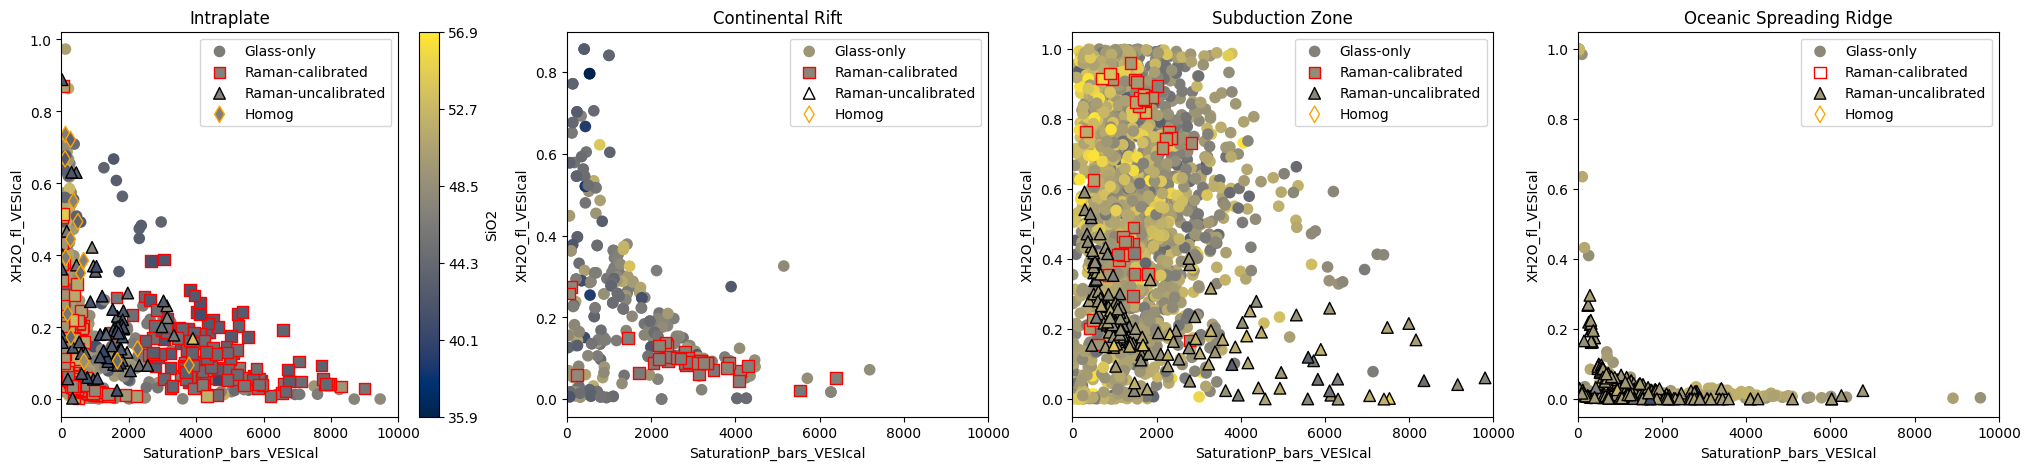

In [155]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

siO2_min_all = vdatafilt['SiO2'].min()
siO2_max_all = vdatafilt['SiO2'].max()

satP_min_all = vdatafilt['SaturationP_bars_VESIcal'].min()
satP_max_all = vdatafilt['SaturationP_bars_VESIcal'].max()

siO2_colormap = plt.get_cmap('cividis')

x_col='SaturationP_bars_VESIcal'
y_col='XH2O_fl_VESIcal'

loc_data = vdatafilt[(is_intraplate) & ~(vdatafilt['Raman/Homog'].str.contains('Raman|Homog'))]

axs[0].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='none', s=70, label='Glass-only', marker='o')



loc_data = vdatafilt[(is_intraplate) & (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]

axs[0].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='r', s=70, label='Raman-calibrated', marker='s')

loc_data = vdatafilt[(is_intraplate) & (vdatafilt['Raman/Homog'].str.contains('Raman-uncal'))]

axs[0].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='k', s=70, label='Raman-uncalibrated', marker='^')

loc_data = vdatafilt[(is_intraplate) & (vdatafilt['Raman/Homog'].str.contains('Homog'))]

axs[0].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='orange', s=70, label='Homog', marker='d')


######################## Plot 2 #####################
loc_data = vdatafilt[(is_rift) & ~(vdatafilt['Raman/Homog'].str.contains('Raman|Homog'))]

axs[1].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='none', s=70, label='Glass-only', marker='o')

loc_data = vdatafilt[(is_rift) & (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]

axs[1].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='r', s=70, label='Raman-calibrated', marker='s')

loc_data = vdatafilt[(is_rift) & (vdatafilt['Raman/Homog'].str.contains('Raman-uncal'))]

axs[1].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='k', s=70, label='Raman-uncalibrated', marker='^')

loc_data = vdatafilt[(is_rift) & (vdatafilt['Raman/Homog'].str.contains('Homog'))]

axs[1].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='orange', s=70, label='Homog', marker='d')

#######################Plot 3##########################
loc_data = vdatafilt[(is_sz) & ~(vdatafilt['Raman/Homog'].str.contains('Raman|Homog'))]

axs[2].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='none', s=70, label='Glass-only', marker='o')

loc_data = vdatafilt[(is_sz) & (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]

axs[2].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='r', s=70, label='Raman-calibrated', marker='s')

loc_data = vdatafilt[(is_sz) & (vdatafilt['Raman/Homog'].str.contains('Raman-uncal'))]

axs[2].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='k', s=70, label='Raman-uncalibrated', marker='^')

loc_data = vdatafilt[(is_sz) & (vdatafilt['Raman/Homog'].str.contains('Homog'))]

axs[2].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='orange', s=70, label='Homog', marker='d')

#######################Plot 4##########################
loc_data = vdatafilt[(is_morb) & ~(vdatafilt['Raman/Homog'].str.contains('Raman|Homog'))]

axs[3].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='none', s=70, label='Glass-only', marker='o')

loc_data = vdatafilt[(is_morb) & (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]

axs[3].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='r', s=70, label='Raman-calibrated', marker='s')

loc_data = vdatafilt[(is_morb) & (vdatafilt['Raman/Homog'].str.contains('Raman-uncal'))]

axs[3].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='k', s=70, label='Raman-uncalibrated', marker='^')

loc_data = vdatafilt[(is_morb) & (vdatafilt['Raman/Homog'].str.contains('Homog'))]

axs[3].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='orange', s=70, label='Homog', marker='d')
######################

cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=siO2_colormap), ax=axs[0], label='SiO2')
cbar.set_label('SiO2')

cbar.set_ticks(np.linspace(0,1, 6))
cbar.ax.set_yticklabels(np.round(np.linspace(siO2_min_all, siO2_max_all, 6),1))

axs[0].set_title("Intraplate")
axs[1].set_title("Continental Rift")
axs[2].set_title("Subduction Zone")
axs[3].set_title("Oceanic Spreading Ridge")

for ax in axs:
    ax.set_ylabel(y_col)
    ax.set_xlabel(x_col)
    ax.legend()
    ax.set_xlim([0,10000])

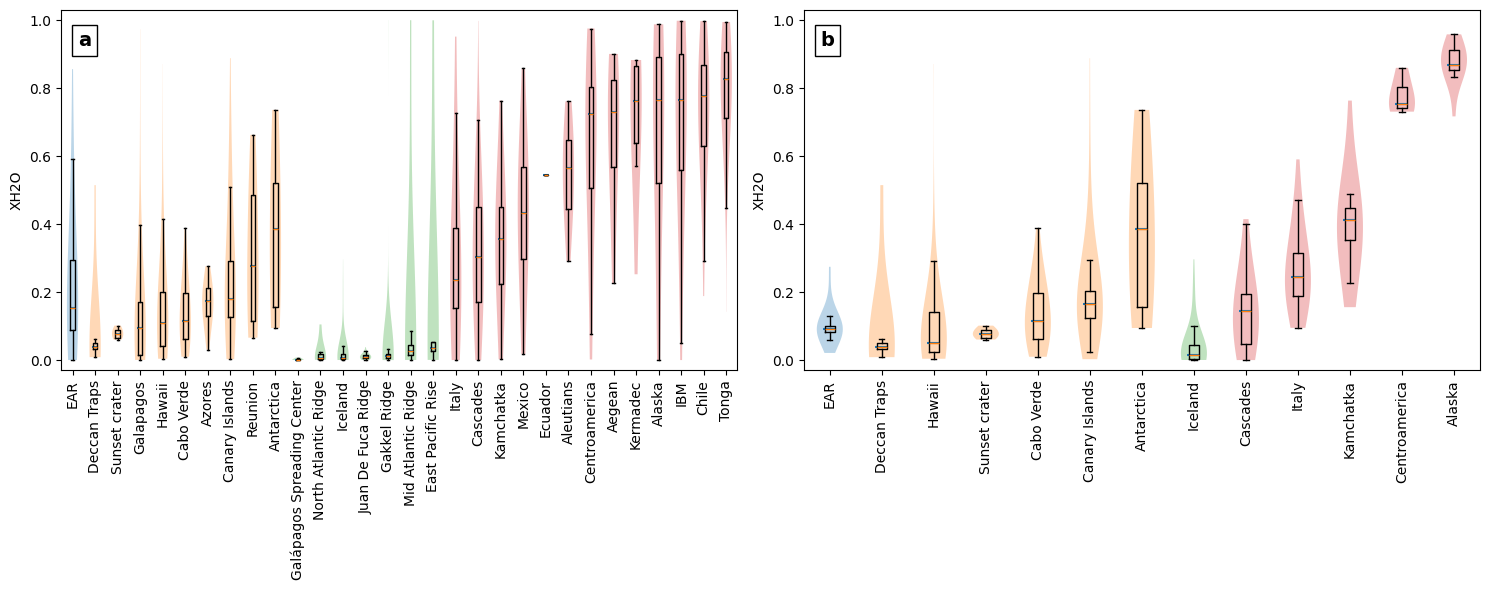

In [156]:
import matplotlib.pyplot as plt

bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')

SiO2_min = 30
SiO2_max = 57

vdatafilt2 = volcanodata[(volcanodata['SiO2'].between(SiO2_min, SiO2_max)) &
                         (volcanodata['FluidMass_grams_VESIcal'] != 0) &
                         ~(volcanodata['SaturationP_bars_VESIcal'] > 15000)]  # Filtering SiO2 <= 57

vdatafilt2 = vdatafilt2.sort_values(by=['Location type','Location','Volcano'])

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

boxplot_data = []
labels = []
location_types = vdatafilt2['Location type'].unique()

for loc_type in location_types:
    loc_data = vdatafilt2[vdatafilt2['Location type'] == loc_type]
    loc_labels = loc_data.groupby('Location')['XH2O_fl_VESIcal'].median().sort_values().index
    labels.extend(loc_labels)
    boxplot_data.extend([loc_data[loc_data['Location'] == loc]['XH2O_fl_VESIcal'].values for loc in loc_labels])


violins = axs[0].violinplot(boxplot_data, showmeans=False, showextrema=False, showmedians=True, bw_method=1)

color_map = plt.get_cmap('tab10')
for i, loc_type in enumerate(location_types):
    loc_indices = vdatafilt2[vdatafilt2['Location type'] == loc_type]['Location']
    violin_indices = [labels.index(loc) for loc in loc_indices]
    for violin_index in violin_indices:
        violins['bodies'][violin_index].set_facecolor(color_map(i))  

axs[0].boxplot(boxplot_data, labels=labels, widths=0.2, showfliers=False)
axs[0].set_xticklabels(labels, rotation=90)
axs[0].set_ylabel('XH2O')


################### Raman +homog only ########################

vdatafilt3=vdatafilt2.copy()

vdatafilt3.dropna(subset=['Raman/Homog'], inplace=True)

boxplot_data = []
labels = []
location_types = vdatafilt3['Location type'].unique()

for loc_type in location_types:
    loc_data = vdatafilt3[vdatafilt3['Location type'] == loc_type]
    loc_labels = loc_data.groupby('Location')['XH2O_fl_VESIcal'].median().sort_values().index
    labels.extend(loc_labels)
    boxplot_data.extend([loc_data[loc_data['Location'] == loc]['XH2O_fl_VESIcal'].values for loc in loc_labels])

violins = axs[1].violinplot(boxplot_data, showmeans=False, showextrema=False, showmedians=True, bw_method=1)

color_map = plt.get_cmap('tab10')
for i, loc_type in enumerate(location_types):
    loc_indices = vdatafilt3[vdatafilt3['Location type'] == loc_type]['Location']
    violin_indices = [labels.index(loc) for loc in loc_indices]
    for violin_index in violin_indices:
        violins['bodies'][violin_index].set_facecolor(color_map(i))  

axs[1].boxplot(boxplot_data, labels=labels, widths=0.2, showfliers=False)
axs[1].set_xticklabels(labels, rotation=90)
axs[1].set_ylabel('XH2O')

axs[0].set_ylim([-0.03,1.03])
axs[1].set_ylim([-0.03,1.03])
fig.tight_layout()


pos=(0.025,0.90)

axs[0].text(pos[0], pos[1], 'a', transform=axs[0].transAxes, fontsize=14, fontweight='bold', bbox=bbox)
axs[1].text(pos[0], pos[1], 'b', transform=axs[1].transAxes, fontsize=14, fontweight='bold', bbox=bbox)

plt.show()


In [157]:
# %pip install cartopy

In [158]:
import pandas as pd

aggregated_df = pd.DataFrame()

grouped = vdatafilt2.groupby('Volcano')

# Iterate over columns
for col in vdatafilt2.columns:
    if pd.api.types.is_numeric_dtype(vdatafilt2[col]):
        # For numeric columns, calculate median only if there is more than one row in the group
        aggregated_df[col] = grouped[col].median() if len(grouped[col]) > 1 else grouped[col].first()
    else:
        # For string columns, preserve the first occurrence
        aggregated_df[col] = grouped[col].first()

aggregated_df = aggregated_df.reset_index(drop=True)
aggregated_df.head()

pd.DataFrame(aggregated_df.to_clipboard(excel=True))


""


""


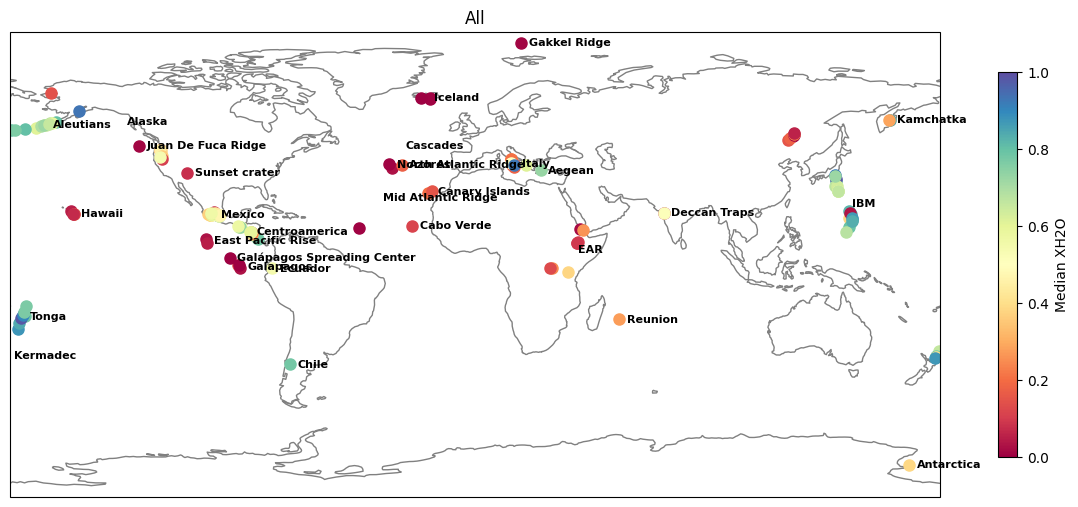

In [151]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

xh2o = pd.read_excel("MI_compilation_XH2O.xlsx", sheet_name="Median_XH2O_all")

# Sample dataframe of volcanoes
data = {
    'Volcano': xh2o['Volcano'],
    'Latitude': xh2o['Latitude'],
    'Longitude': xh2o['Longitude'],
    'XH2O': xh2o['XH2O_fl_VESIcal'],
    'Location': xh2o['Location']  # Assuming you have a column for location
}

df = pd.DataFrame(data)

plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(color='grey')


for index, row in df.iterrows():
    ax.plot(row['Longitude'], row['Latitude'], 'o', markersize=8, transform=ccrs.PlateCarree(),
            color=plt.cm.Spectral(row['XH2O']))

    # ax.annotate(row['Volcano'], (row['Longitude'], row['Latitude']),
    #             xytext=(5, 5), textcoords='offset points', fontsize=8)


for location in df['Location'].unique():
    loc_df = df[df['Location'] == location]
    avg_lat = loc_df['Latitude'].mean()
    avg_lon = loc_df['Longitude'].mean()
    ax.text(avg_lon + 3, avg_lat, location, transform=ccrs.PlateCarree(),
            fontsize=8, fontweight='bold', va='center', color='black')


sm = plt.cm.ScalarMappable(cmap='Spectral')
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Median XH2O', shrink=0.5)  # Adjust shrink parameter here
# plt.title("<57 wt% SiO2 only")
plt.title("All")
plt.show()


C:\Users\charl\AppData\Local\Temp\ipykernel_4748\4212622987.py:114: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


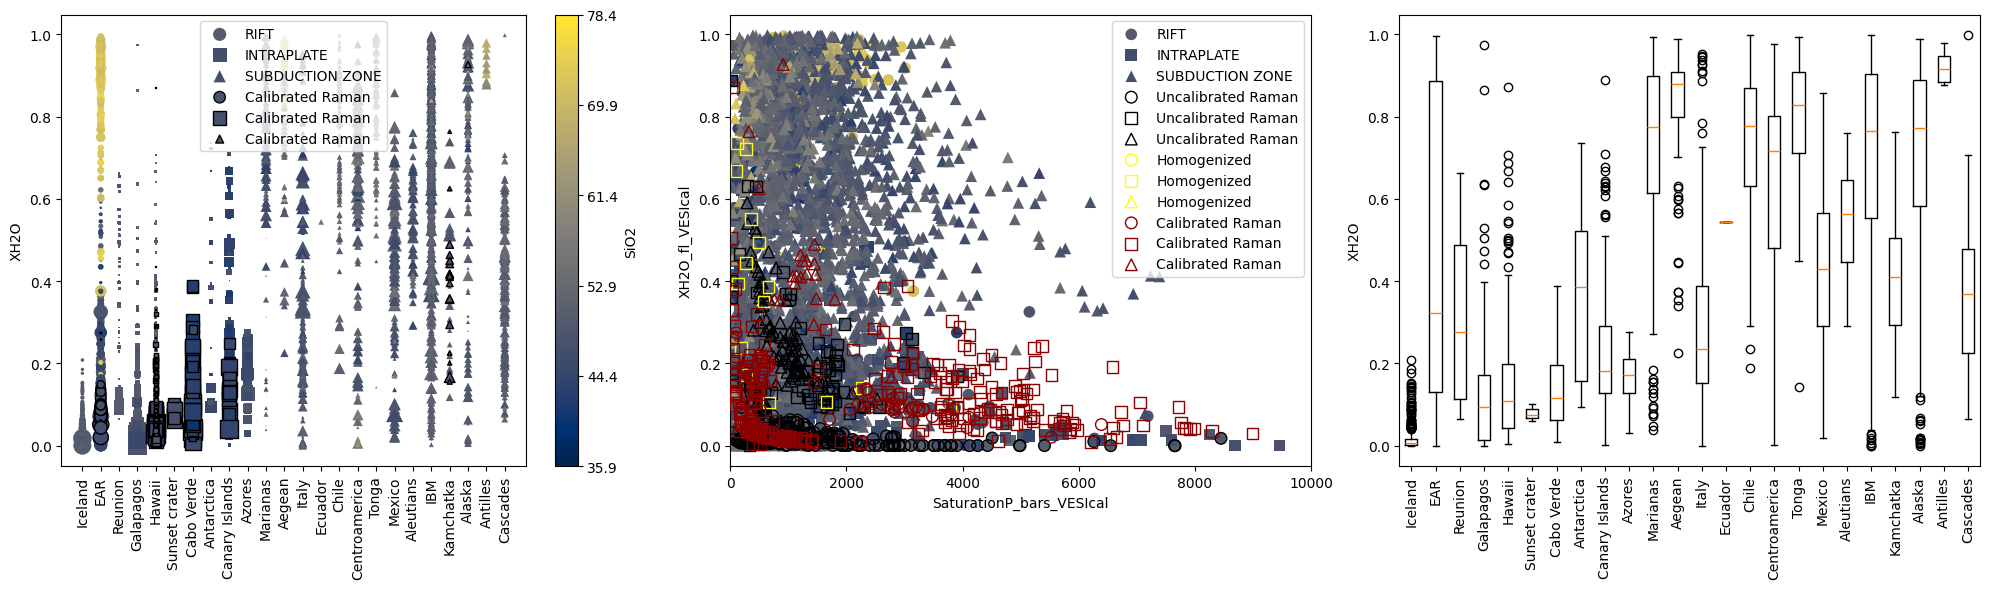

In [370]:
SiO2_min = 30
SiO2_max = 80
vdatafilt = volcanodata[(volcanodata['SiO2'].between(SiO2_min, SiO2_max)) &
                                   (volcanodata['FluidMass_grams_VESIcal'] != 0)&~(volcanodata['SaturationP_bars_VESIcal']>15000)]  # Filtering SiO2 <= 57

vdatafilt.loc[:, 'Raman/Homog'] = vdatafilt['Raman/Homog'].fillna('')

# Define the order of 'Location type'
location_type_order = ['RIFT', 'INTRAPLATE', 'SUBDUCTION ZONE']

# Calculate the minimum and maximum SiO2 values from the whole dataset
siO2_min_all = vdatafilt['SiO2'].min()
siO2_max_all = vdatafilt['SiO2'].max()

# Calculate the minimum and maximum SaturationP_bars_VESIcal values from the whole dataset
satP_min_all = vdatafilt['SaturationP_bars_VESIcal'].min()
satP_max_all = vdatafilt['SaturationP_bars_VESIcal'].max()

# Create a color map for SiO2 values based on the whole dataset
siO2_colormap = plt.get_cmap('cividis')

# Define markers for each Location Type
markers = ['o', 's', '^']

# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Scatter plot without edge color
for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[vdatafilt['Location type'] == loc_type]
    # Normalize symbol sizes between 0 and 200 using min-max scaling
    symbol_sizes = 200 * (loc_data['SaturationP_bars_VESIcal'] - satP_min_all) / (satP_max_all - satP_min_all)
    axs[0].scatter(loc_data['Location'], loc_data['XH2O_fl_VESIcal'],
                   c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
                   edgecolor='none', s=symbol_sizes, label=loc_type, marker=marker)

# Scatter plot with only edge color
for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]
    symbol_sizes = 200 * (loc_data['SaturationP_bars_VESIcal'] - satP_min_all) / (satP_max_all - satP_min_all)
    axs[0].scatter(loc_data['Location'], loc_data['XH2O_fl_VESIcal'],
                   c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
                   edgecolor='black', s=symbol_sizes, label='Calibrated Raman', marker=marker, zorder=5)

axs[0].set_ylabel('XH2O')
axs[0].set_xticks(axs[0].get_xticks())
axs[0].tick_params(axis='x', rotation=90)
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=siO2_colormap), ax=axs[0], label='SiO2')
cbar.set_label('SiO2')
axs[0].legend(loc='upper center')

cbar.set_ticks(np.linspace(0,1, 6))
cbar.ax.set_yticklabels(np.round(np.linspace(siO2_min_all, siO2_max_all, 6),1))

x_col='SaturationP_bars_VESIcal'
y_col='XH2O_fl_VESIcal'

# Scatter plot without edge color
for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    ~(vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]
    axs[1].scatter(loc_data[x_col], loc_data[y_col],
                c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
                edgecolor='none', s=70, label=loc_type, marker=marker)

# Scatter plot with only edge color

for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    (vdatafilt['Raman/Homog'].str.contains('Raman-uncal'))]
    axs[1].scatter(loc_data[x_col], loc_data[y_col],
                c='none',
                edgecolor='black', s=70,  marker=marker, zorder=5,label='Uncalibrated Raman')

for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    (vdatafilt['Raman/Homog'].str.contains('Homog'))]
    axs[1].scatter(loc_data[x_col], loc_data[y_col],
                                c='none',
                edgecolor='yellow', s=70,  marker=marker, zorder=5,label='Homogenized')
for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]
    axs[1].scatter(loc_data[x_col], loc_data[y_col],
                                c='none',
                edgecolor='darkred', s=70,  marker=marker, zorder=5,label='Calibrated Raman')

axs[1].set_ylabel(y_col)
axs[1].set_xlabel(x_col)


axs[1].legend()
axs[1].set_xlim([0,10000])


# Boxplot
boxplot_data = [vdatafilt[vdatafilt['Location'] == loc]['XH2O_fl_VESIcal'].values for loc in vdatafilt['Location'].unique()]
labels = vdatafilt['Location'].unique()
axs[2].boxplot(boxplot_data, labels=labels)
axs[2].set_xticklabels(labels, rotation=90)
axs[2].set_ylabel('XH2O')


fig.tight_layout()
fig.show()


(0.0, 10000.0)

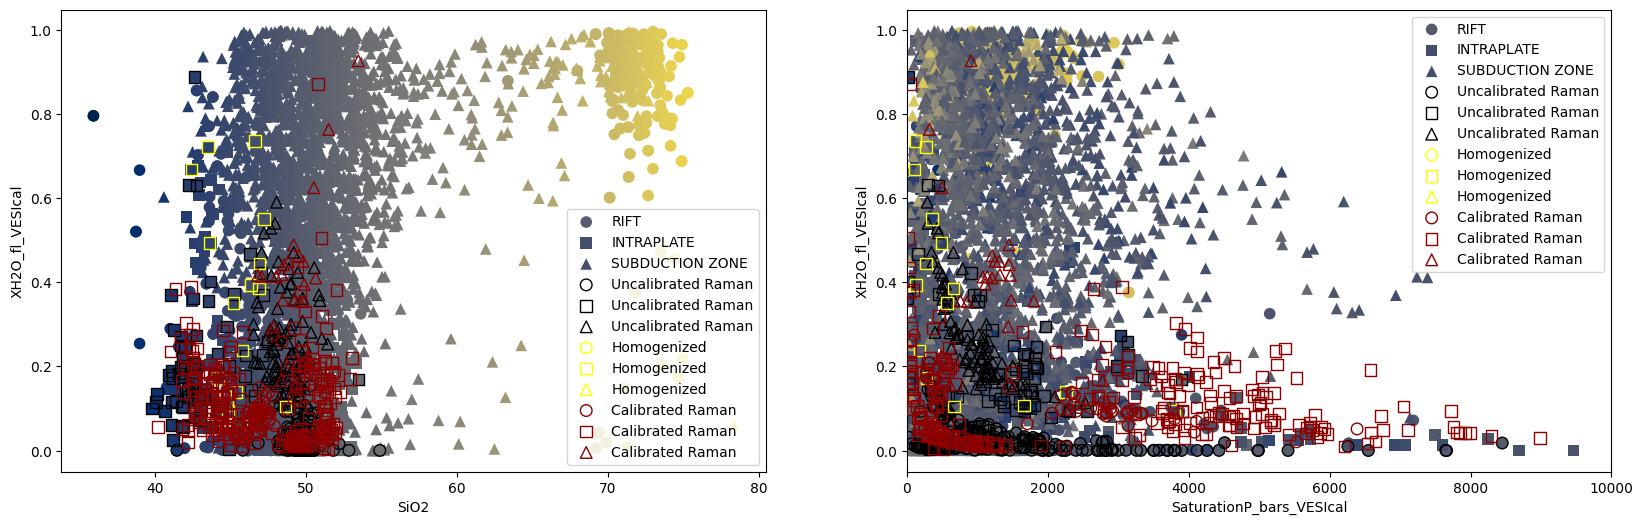

In [381]:
SiO2_min = 30
SiO2_max = 80
# Read the data from Excel file
volcanodata = pd.read_excel("MI_compilation_XH2O.xlsx", sheet_name="XH2O_calculated")

# Filter rows with SiO2 and FluidMass_grams_VESIcal not equal to 0
vdatafilt = volcanodata[(volcanodata['SiO2'].between(SiO2_min, SiO2_max)) &
                                   (volcanodata['FluidMass_grams_VESIcal'] != 0)&~(volcanodata['SaturationP_bars_VESIcal']>15000)]  # Filtering SiO2 <= 57

vdatafilt.loc[:, 'Raman/Homog'] = vdatafilt['Raman/Homog'].fillna('')

# Define the order of 'Location type'
location_type_order = ['RIFT', 'INTRAPLATE', 'SUBDUCTION ZONE']

# Calculate the minimum and maximum SiO2 values from the whole dataset
siO2_min_all = vdatafilt['SiO2'].min()
siO2_max_all = vdatafilt['SiO2'].max()

# Calculate the minimum and maximum SaturationP_bars_VESIcal values from the whole dataset
satP_min_all = vdatafilt['SaturationP_bars_VESIcal'].min()
satP_max_all = vdatafilt['SaturationP_bars_VESIcal'].max()

# Create a color map for SiO2 values based on the whole dataset
siO2_colormap = plt.get_cmap('cividis')

# Define markers for each Location Type
markers = ['o', 's', '^']

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

x_col='SiO2'
y_col='XH2O_fl_VESIcal'

# Scatter plot without edge color
for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    ~(vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]
    axs[0].scatter(loc_data[x_col], loc_data[y_col],
                c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
                edgecolor='none', s=70, label=loc_type, marker=marker)

# Scatter plot with only edge color

for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    (vdatafilt['Raman/Homog'].str.contains('Raman-uncal'))]
    axs[0].scatter(loc_data[x_col], loc_data[y_col],
                c='none',
                edgecolor='black', s=70,  marker=marker, zorder=5,label='Uncalibrated Raman')

for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    (vdatafilt['Raman/Homog'].str.contains('Homog'))]
    axs[0].scatter(loc_data[x_col], loc_data[y_col],
                                c='none',
                edgecolor='yellow', s=70,  marker=marker, zorder=5,label='Homogenized')
for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]
    axs[0].scatter(loc_data[x_col], loc_data[y_col],
                                c='none',
                edgecolor='darkred', s=70,  marker=marker, zorder=5,label='Calibrated Raman')

axs[0].set_ylabel(y_col)
axs[0].set_xlabel(x_col)


axs[0].legend()


x_col='SaturationP_bars_VESIcal'
y_col='XH2O_fl_VESIcal'

# Scatter plot without edge color
for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    ~(vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]
    axs[1].scatter(loc_data[x_col], loc_data[y_col],
                c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
                edgecolor='none', s=70, label=loc_type, marker=marker)

# Scatter plot with only edge color

for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    (vdatafilt['Raman/Homog'].str.contains('Raman-uncal'))]
    axs[1].scatter(loc_data[x_col], loc_data[y_col],
                c='none',
                edgecolor='black', s=70,  marker=marker, zorder=5,label='Uncalibrated Raman')

for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    (vdatafilt['Raman/Homog'].str.contains('Homog'))]
    axs[1].scatter(loc_data[x_col], loc_data[y_col],
                                c='none',
                edgecolor='yellow', s=70,  marker=marker, zorder=5,label='Homogenized')
for loc_type, marker in zip(location_type_order, markers):
    loc_data = vdatafilt[(vdatafilt['Location type'] == loc_type) & 
                                    (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]
    axs[1].scatter(loc_data[x_col], loc_data[y_col],
                                c='none',
                edgecolor='darkred', s=70,  marker=marker, zorder=5,label='Calibrated Raman')

axs[1].set_ylabel(y_col)
axs[1].set_xlabel(x_col)


axs[1].legend()
axs[1].set_xlim([0,10000])

In [147]:
# %pip install cartopy

In [377]:
import pandas as pd

aggregated_df = pd.DataFrame()

grouped = vdatafilt.groupby('Volcano')

# Iterate over columns
for col in vdatafilt.columns:
    if pd.api.types.is_numeric_dtype(vdatafilt[col]):
        # For numeric columns, calculate median only if there is more than one row in the group
        aggregated_df[col] = grouped[col].median() if len(grouped[col]) > 1 else grouped[col].first()
    else:
        # For string columns, preserve the first occurrence
        aggregated_df[col] = grouped[col].first()

aggregated_df = aggregated_df.reset_index(drop=True)
aggregated_df.head()


,Vesical_Output_name (before fix),Sample_ID,Raman/Homog,Location type,Location,Volcano,Latitude,Longitude,SiO2,TiO2,...,FeO,Fe2O3,Temp,SaturationP_bars_VESIcal,XH2O_fl_VESIcal,XCO2_fl_VESIcal,FluidMass_grams_VESIcal,FluidSystem_wt_VESIcal,Model,Warnings
0,"HIGH CASCADES, BLUE LAKE MAAR",Ruscitto_2010_Cascades_50,,SUBDUCTION ZONE,Cascades,BLUE LAKE MAAR,44.40857,-121.77413,53.260,1.00,...,6.00950,1.178333,1108.685,2150.0,0.500703,0.499297,0.000312,0.000312,MagmaSat,NaN
1,"HIGH CASCADES, COLLIER CONE",Ruscitto_2010_Cascades_34,,SUBDUCTION ZONE,Cascades,COLLIER CONE,44.18000,-121.78000,52.280,1.09,...,5.44425,1.067500,1112.005,1790.0,0.384527,0.615473,0.000497,0.000497,MagmaSat,NaN
2,"HIGH CASCADES, GARRISON BUTTE",Ruscitto_2010_Cascades_40,,SUBDUCTION ZONE,Cascades,GARRISON BUTTE,44.38737,-121.53858,48.725,1.49,...,7.55650,1.481667,1136.241,1625.0,0.242748,0.757252,0.000537,0.000537,MagmaSat,NaN
3,"HIGH CASCADES, ISLAND FISSURE",Ruscitto_2010_Cascades_16,,SUBDUCTION ZONE,Cascades,ISLAND FISSURE,44.20905,-121.79552,51.060,1.38,...,6.34950,1.245000,1114.578,1370.0,0.310666,0.689334,0.000413,0.000413,MagmaSat,NaN
4,"HIGH CASCADES, SAND MOUNTAIN",Ruscitto_2010_Cascades_11,,SUBDUCTION ZONE,Cascades,SAND MOUNTAIN,44.39418,-121.73950,49.750,1.42,...,6.63000,1.300000,1133.502,1430.0,0.484853,0.515147,0.000409,0.000409,MagmaSat,NaN


In [378]:
pd.DataFrame(aggregated_df.to_clipboard(excel=True))

""


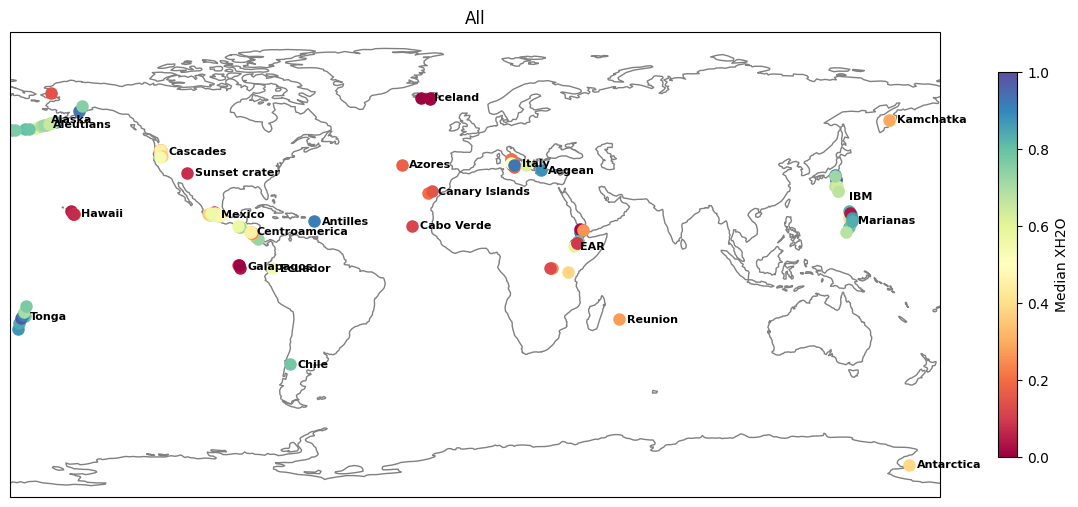

In [379]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

xh2o = pd.read_excel("MI_compilation_XH2O.xlsx", sheet_name="Median_XH2O_all")

# Sample dataframe of volcanoes
data = {
    'Volcano': xh2o['Volcano'],
    'Latitude': xh2o['Latitude'],
    'Longitude': xh2o['Longitude'],
    'XH2O': xh2o['XH2O_fl_VESIcal'],
    'Location': xh2o['Location']  # Assuming you have a column for location
}

df = pd.DataFrame(data)

plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(color='grey')


for index, row in df.iterrows():
    ax.plot(row['Longitude'], row['Latitude'], 'o', markersize=8, transform=ccrs.PlateCarree(),
            color=plt.cm.Spectral(row['XH2O']))

    # ax.annotate(row['Volcano'], (row['Longitude'], row['Latitude']),
    #             xytext=(5, 5), textcoords='offset points', fontsize=8)


for location in df['Location'].unique():
    loc_df = df[df['Location'] == location]
    avg_lat = loc_df['Latitude'].mean()
    avg_lon = loc_df['Longitude'].mean()
    ax.text(avg_lon + 3, avg_lat, location, transform=ccrs.PlateCarree(),
            fontsize=8, fontweight='bold', va='center', color='black')


sm = plt.cm.ScalarMappable(cmap='Spectral')
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Median XH2O', shrink=0.5)  # Adjust shrink parameter here
# plt.title("<57 wt% SiO2 only")
plt.title("All")
plt.show()


### Loop pressure vs XH2O plots

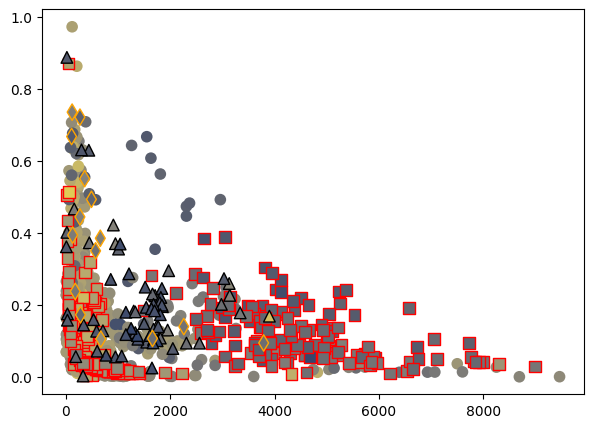

In [34]:
volcanodata = pd.read_excel("MI_compilation_XH2O.xlsx", sheet_name="XH2O_calculated")

SiO2_min = 30
SiO2_max = 57

vdatafilt = volcanodata[(volcanodata['SiO2'].between(SiO2_min, SiO2_max)) &
                                   (volcanodata['FluidMass_grams_VESIcal'] != 0)]  # Filtering SiO2 <= 57

vdatafilt.loc[:, 'Raman/Homog'] = vdatafilt['Raman/Homog'].fillna('')

is_intraplate=vdatafilt['Location type']=='INTRAPLATE'
is_sz=vdatafilt['Location type']=='SUBDUCTION ZONE'
is_rift=vdatafilt['Location type']=='RIFT'

fig, axs = plt.subplots(1, 1, figsize=(7, 5))

siO2_min_all = vdatafilt['SiO2'].min()
siO2_max_all = vdatafilt['SiO2'].max()

satP_min_all = vdatafilt['SaturationP_bars_VESIcal'].min()
satP_max_all = vdatafilt['SaturationP_bars_VESIcal'].max()

siO2_colormap = plt.get_cmap('cividis')

x_col='SaturationP_bars_VESIcal'
y_col='XH2O_fl_VESIcal'

locations=vdatafilt
loc_data = vdatafilt[(is_intraplate) & ~(vdatafilt['Raman/Homog'].str.contains('Raman|Homog'))]


loc_data = vdatafilt[(is_intraplate) & ~(vdatafilt['Raman/Homog'].str.contains('Raman|Homog'))]

axs.scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='none', s=70, label='Glass-only', marker='o')



loc_data = vdatafilt[(is_intraplate) & (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]

axs.scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='r', s=70, label='Raman-calibrated', marker='s')

loc_data = vdatafilt[(is_intraplate) & (vdatafilt['Raman/Homog'].str.contains('Raman-uncal'))]

axs.scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='k', s=70, label='Raman-uncalibrated', marker='^')

loc_data = vdatafilt[(is_intraplate) & (vdatafilt['Raman/Homog'].str.contains('Homog'))]

axs.scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='orange', s=70, label='Homog', marker='d')



In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(22, 5))

siO2_min_all = vdatafilt['SiO2'].min()
siO2_max_all = vdatafilt['SiO2'].max()

satP_min_all = vdatafilt['SaturationP_bars_VESIcal'].min()
satP_max_all = vdatafilt['SaturationP_bars_VESIcal'].max()

siO2_colormap = plt.get_cmap('cividis')

x_col='SaturationP_bars_VESIcal'
y_col='XH2O_fl_VESIcal'

loc_data = vdatafilt[(is_intraplate) & ~(vdatafilt['Raman/Homog'].str.contains('Raman|Homog'))]

axs[0].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='none', s=70, label='Glass-only', marker='o')



loc_data = vdatafilt[(is_intraplate) & (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]

axs[0].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='r', s=70, label='Raman-calibrated', marker='s')

loc_data = vdatafilt[(is_intraplate) & (vdatafilt['Raman/Homog'].str.contains('Raman-uncal'))]

axs[0].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='k', s=70, label='Raman-uncalibrated', marker='^')

loc_data = vdatafilt[(is_intraplate) & (vdatafilt['Raman/Homog'].str.contains('Homog'))]

axs[0].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='orange', s=70, label='Homog', marker='d')



######################## Plot 2 #####################
loc_data = vdatafilt[(is_rift) & ~(vdatafilt['Raman/Homog'].str.contains('Raman|Homog'))]

axs[1].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='none', s=70, label='Glass-only', marker='o')

loc_data = vdatafilt[(is_rift) & (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]

axs[1].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='r', s=70, label='Raman-calibrated', marker='s')

loc_data = vdatafilt[(is_rift) & (vdatafilt['Raman/Homog'].str.contains('Raman-uncal'))]

axs[1].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='k', s=70, label='Raman-uncalibrated', marker='^')

loc_data = vdatafilt[(is_rift) & (vdatafilt['Raman/Homog'].str.contains('Homog'))]

axs[1].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='orange', s=70, label='Homog', marker='d')

#######################Plot 3##########################
loc_data = vdatafilt[(is_sz) & ~(vdatafilt['Raman/Homog'].str.contains('Raman|Homog'))]

axs[2].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='none', s=70, label='Glass-only', marker='o')

loc_data = vdatafilt[(is_sz) & (vdatafilt['Raman/Homog'].str.contains('Raman-cal'))]

axs[2].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='r', s=70, label='Raman-calibrated', marker='s')

loc_data = vdatafilt[(is_sz) & (vdatafilt['Raman/Homog'].str.contains('Raman-uncal'))]

axs[2].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='k', s=70, label='Raman-uncalibrated', marker='^')

loc_data = vdatafilt[(is_sz) & (vdatafilt['Raman/Homog'].str.contains('Homog'))]

axs[2].scatter(loc_data[x_col], loc_data[y_col],
            c=loc_data['SiO2'], cmap=siO2_colormap, vmin=siO2_min_all, vmax=siO2_max_all,
            edgecolor='orange', s=70, label='Homog', marker='d')
######################

cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=siO2_colormap), ax=axs[0], label='SiO2')
cbar.set_label('SiO2')

cbar.set_ticks(np.linspace(0,1, 6))
cbar.ax.set_yticklabels(np.round(np.linspace(siO2_min_all, siO2_max_all, 6),1))

axs[0].set_title("Intraplate")
axs[1].set_title("Rift")
axs[2].set_title("Subduction Zone")

for ax in axs:
    ax.set_ylabel(y_col)
    ax.set_xlabel(x_col)
    ax.legend()
    ax.set_xlim([0,10000])